<a href="https://colab.research.google.com/github/limjs19/first-repository/blob/master/Blog_6_Autoencoder_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q tensorflow-gpu==2.0.0-rc1
import tensorflow as tf

     |████████████████████████████████| 380.5MB 34kB/s 
     |████████████████████████████████| 501kB 52.9MB/s 
     |████████████████████████████████| 4.3MB 19.5MB/s 
     |████████████████████████████████| 51kB 7.7MB/s 


In [ ]:
# 코드를 읽고, 코딩하기도 편하게 따로 불러와줍니다.
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


#1. Autoencoder

In [ ]:
inputs = keras.Input(shape=(28, 28))
x = layers.Flatten()(inputs)
x = layers.Dense(128)(x)
x = layers.Dense(64)(x)
x = layers.Dense(128)(x)
x = layers.Dense(28*28)(x)
x = layers.Reshape((28,28))(x)
outputs = x


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 784)               101136    
_________________________________________________________________
reshape (Reshape)            (None, 28, 28)            0     

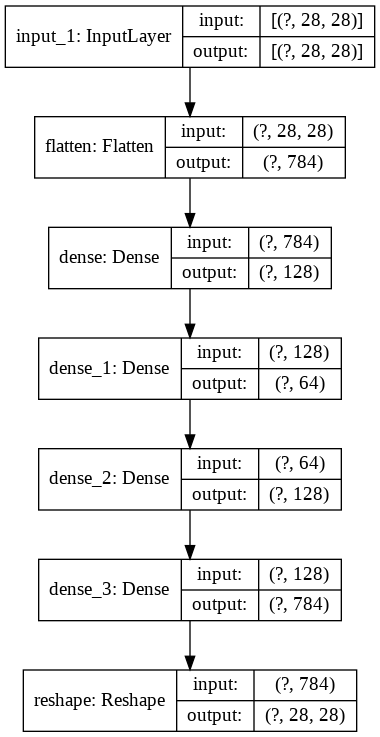

In [ ]:
model = keras.Model(inputs, outputs)
model.summary()
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

In [ ]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])
model.fit(x_train, x_train, epochs=5)
model.evaluate(x_test,  x_test, verbose=2)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 118us/sample - loss: 0.0147 - mae: 0.0683
Epoch 2/5
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0098 - mae: 0.0555
Epoch 3/5
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0097 - mae: 0.0550
Epoch 4/5
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0096 - mae: 0.0547
Epoch 5/5
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0096 - mae: 0.0546
10000/1 - 1s - loss: 0.0089 - mae: 0.0536


[0.009322000569105149, 0.053619653]

In [ ]:
results = model(x_test)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



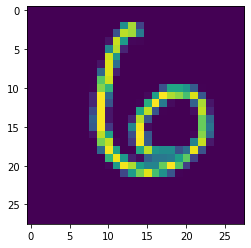

In [ ]:
# 로딩된 MNIST 데이터 가시화
import matplotlib.pyplot as plt

img_origin  = x_test[100]
plt.imshow(img_origin)

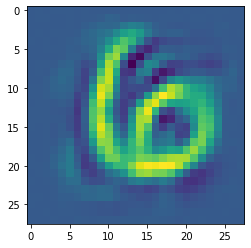

In [ ]:
img_fake  = results[100]
plt.imshow(img_fake)

#2. Convolutional AutoEncoder

In [ ]:
inputs = keras.Input(shape=(28, 28))
x = layers.Reshape((28,28,1))(inputs)

x = layers.Conv2D(32, 3, activation='relu', padding="same")(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(32, 3, activation='relu', padding="same")(x)
x = layers.MaxPooling2D(2)(x)

z = layers.Flatten()(x)
x = layers.Reshape((7,7,32))(z)

#Pooling의 역과정은 Transposed Conv로 구성하는 경우가 많다.
x = layers.Conv2DTranspose(32,2,2)(x)
x = layers.Conv2D(32, 3, activation='relu', padding="same")(x)
x = layers.Conv2DTranspose(32,2,2)(x)
x = layers.Conv2D(1, 3, activation='relu', padding="same")(x)

x = layers.Reshape((28,28))(x)

outputs = x


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0   

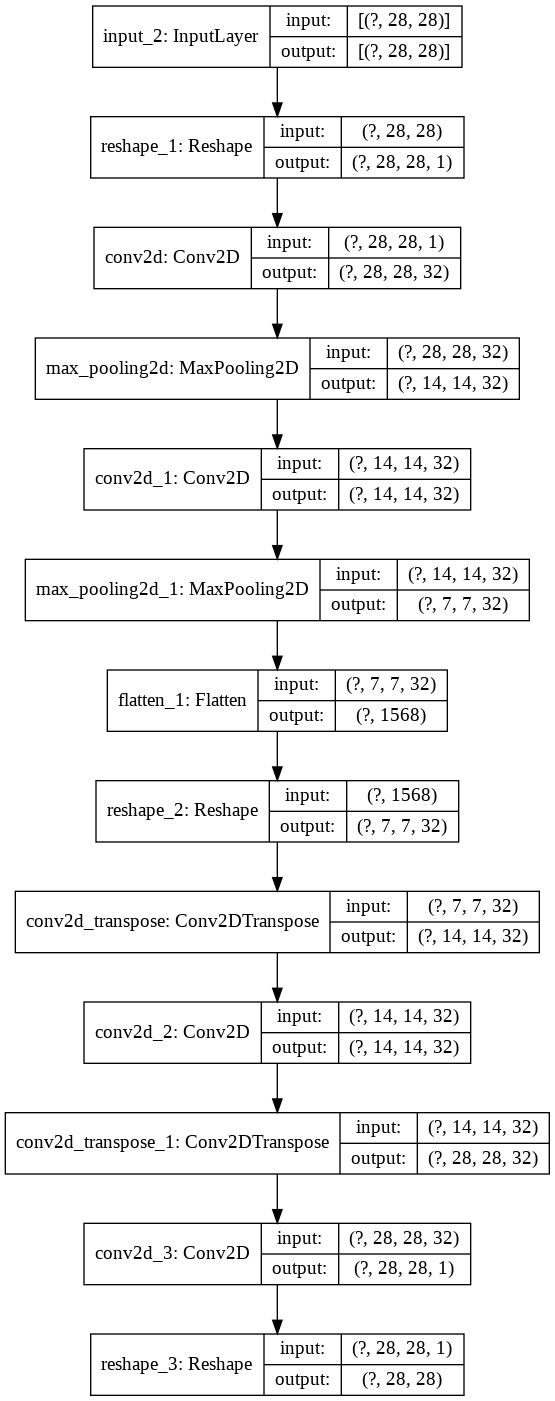

In [ ]:

model = keras.Model(inputs, outputs)
model.summary()
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

In [ ]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])
model.fit(x_train, x_train, epochs=5)
model.evaluate(x_test,  x_test, verbose=2)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 14s 230us/sample - loss: 0.0047 - mae: 0.0219
Epoch 2/5
60000/60000 [==============================] - 7s 123us/sample - loss: 0.0020 - mae: 0.0142
Epoch 3/5
60000/60000 [==============================] - 7s 122us/sample - loss: 0.0016 - mae: 0.0128
Epoch 4/5
60000/60000 [==============================] - 7s 121us/sample - loss: 0.0014 - mae: 0.0119
Epoch 5/5
60000/60000 [==============================] - 7s 124us/sample - loss: 0.0013 - mae: 0.0113
10000/1 - 1s - loss: 0.0012 - mae: 0.0109


[0.001209178995899856, 0.01092601]

In [ ]:
results = model(x_test)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



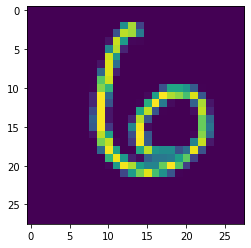

In [ ]:
img_origin  = x_test[100]
plt.imshow(img_origin)

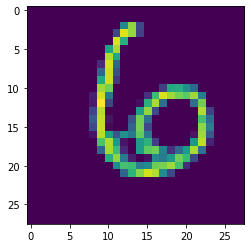

In [ ]:
img_fake  = results[100]
plt.imshow(img_fake)